# 流量時系列分布をガンマ分布で表現する理由

## 結論

- 石原先生の論文:[流出函数による由良川洪水の解析](https://www.jstage.jst.go.jp/article/jscej1949/1958/57/1958_57_1/_article/-char/ja/)に示されるとおりである。
- 論文中の「3.基礎式の解析」p.2までを以下に示す。

## 2.基礎方程式の誘導

貯留量$S$、流入量$I$および流出量$Q$の連続式は、

$$
\begin{align}
\dfrac{dS}{dt}=I-Q
\end{align}
$$

である。

$S=Q/\alpha$が成立するものとすると、

$$
\begin{align}
\dfrac{dS}{dt}=\alpha\left(I-Q\right),\alpha>0
\end{align}
$$

さらに$f(t)=I/Q$とすると、

$$
\begin{align}
dQ=\alpha Q(f(t)-1)
\end{align}
$$

となる。変数分離法により、この常微分方程式を解くと、

$$
\begin{align}
\dfrac{dQ}{Q} &=\alpha(f(t)-1)dt \\
\int \dfrac{dQ}{Q} &= \int \alpha(f(t)-1)dt \\
\log Q &= \alpha \int f(t)dt - \alpha t + C
\end{align}
$$

ここで、$C$：積分定数である。流出量$Q$の式にすると、


$$
\begin{align}
% Q&=\exp \left[-\alpha t + \alpha \int f(t) dt + C\right] \\
Q&=e^{-\alpha t + \alpha \int f(t) dt + C} \\
Q&=a e^{-\alpha t}e^{\alpha \int f(t)dt}
\end{align}
$$

ここで、$e^C$を新たに$a$とする。


次に$f(t)$を設定する。

$t=0$の時、$Q=0$となるためには、

$$
\begin{align}
\int f(t) dt \rightarrow -\infty
\end{align}
$$

$t=t_m$ (最大値を取る時刻)では、流入量$I$と流出量$Q$が等しくなるため、

$$
\begin{align}
f(t_m)=I/Q=1
\end{align}
$$

となる。


このような関数形のうち、単純なものとして、$f(t)=t_m/t$を本論中では選択している。

$$
\begin{align}
\int f(t)dt = \int t_m/t dt = t_m \log t +C
\end{align}
$$

であるのでこれを代入すると、

$$
\begin{align}
Q=ae^{-\alpha t} e^{\alpha \int f(t)dt} = a t^n e^{-\alpha t}
\end{align}
$$

ここで、$n=\alpha t_m$，$n \ge 1$


流域面積をBとすると比流量（単位流域面積当たりの流量）は、

$$
\begin{align}
q=\dfrac{Q}{B}=\dfrac{a}{B}t^n e^{-\alpha t} = a_1 t^n e^{-\alpha t}
\end{align}
$$



ここで、$a_1=Q/B$である。


## 3.基礎式の解析

次に、$a_1$を消去する。条件としては単位雨量に対して単位流出流量曲線（以下、論文図―2）を考える。

![image.png](https://computational-sediment-hyd.github.io/QintoGammaDistr/image.png)

単位時間$dT$当たり、単位雨量が降ったとする。$q$を時間に関して$0$～$\infty$まで積分すると、単位雨量$1\cdot dT$と等しくなる。



$$
\begin{align}
\int_0^\infty q dt = \int_0^\infty a_1 t^n e^{-\alpha t}dt = a_1 \dfrac{\Gamma(n+1)}{\alpha^{n+1}}
\end{align}
$$

ここで、ガンマ関数の関係である以下の式を用いた。

$$
\begin{align}
\int_0^\infty s^{x-1} e^{-as}ds &= \Gamma(x)/a^x \\
a_1 \dfrac{\Gamma(n+1)}{\alpha^{n+1}} & =1\cdot dT \\
a_1 &= \dfrac{\alpha^{n+1}}{\Gamma(n+1)}dT \\
q &=a_1t^n e^{-\alpha t} = \dfrac{\alpha^{n+1}}{\Gamma(n+1)}e^{-\alpha t}t^n dT
\end{align}
$$

<!-- \int_0^\infty s^{x-1} e^{-as}ds=\Gamma(x)/a^x
a_1 \dfrac{\Gamma(n+1)}{\alpha^{n+1}}=1\cdot dT
a_1 = \dfrac{\alpha^{n+1}}{\Gamma(n+1)}dT
q=a_1t^n e^{-\alpha t} = \dfrac{\alpha^{n+1}}{\Gamma(n+1)}e^{-\alpha t}t^n dT -->

となる。両辺の単位を合わせるために、係数$0.2778(=1000/3600)$を乗ずることで、式（9）となる。


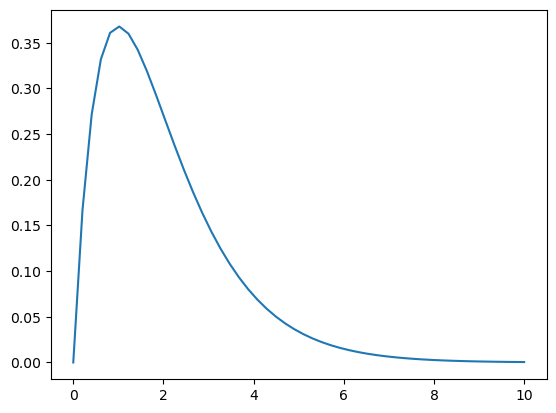

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

x = np.linspace(0,10)
gamma_pdf = gamma(a=2.0, scale=1.0).pdf
y = gamma_pdf(x)

plt.plot(x,y)